In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Explore Categorical Data

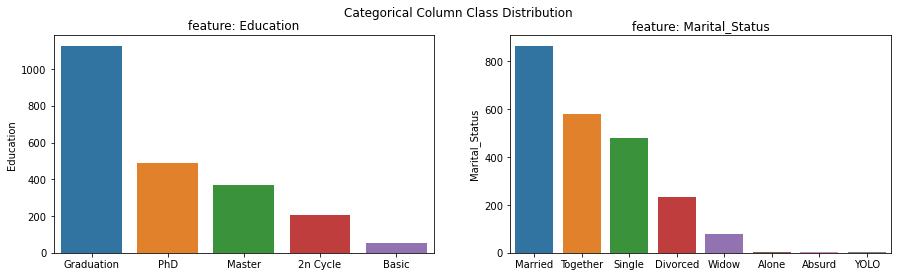

In [5]:
# select out categorical columns
category_col = df.select_dtypes(include='object').columns
category_col = category_col.drop("Dt_Customer")

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle("Categorical Column Class Distribution")
plt.subplots_adjust(hspace=0.3)
for var, subplot in zip(category_col, ax.flatten()):
    sns.barplot(x = df[var].value_counts().index, 
                y = df[var].value_counts(), 
                ax = subplot).set(title ="feature: "+var)

In [6]:
# find all continuous column
continuous_col = df.select_dtypes(include=['int64','float64']).columns
continuous_col = continuous_col.drop("ID")

# select out possible categorical columns
category_col_add = []
for var in continuous_col:
    if len(df[var].unique())<5:
        category_col_add.append(var)

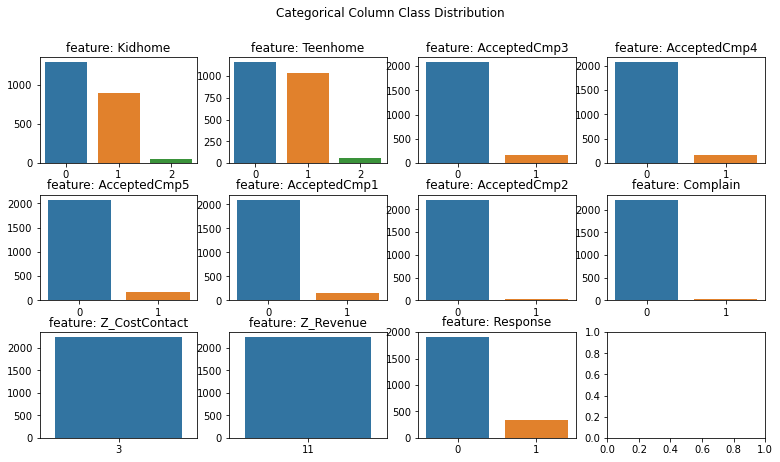

In [7]:
fig, ax = plt.subplots(-(-len(category_col_add)//4),4,figsize=(13,7))
plt.suptitle("Additional Categorical Column Class Distribution")
plt.subplots_adjust(hspace=0.3)
for var, subplot in zip(category_col_add, ax.flatten()):
    sns.barplot(x = df[var].value_counts().index, 
                y = df[var].value_counts(), 
                ax = subplot).set(ylabel = None, title ="feature: "+var)

`Kidhome` and `Teenhome` feature calculates how many kids/teens in one household. The maximum is 2. <br>
`Z_CostContact` and `Z_Revenue` may be able to be dropped because there is only one value for all data.

In [8]:
df_cleaned = df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

#### Explore Continuous Data

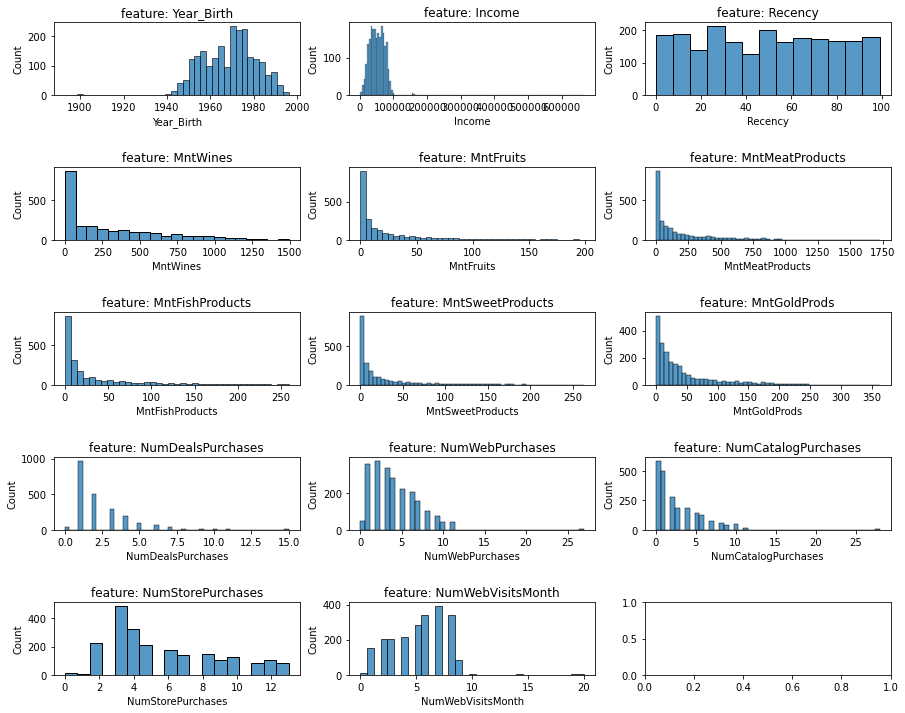

In [9]:
continuous_col_cleaned = continuous_col.drop(category_col_add)

fig, ax = plt.subplots(-(-len(continuous_col_cleaned)//3),3,figsize=(15,12))
plt.subplots_adjust(hspace=1)
for var, subplot in zip(continuous_col_cleaned, ax.flatten()):
    sns.histplot(df[var], ax = subplot).set(title ="feature: "+var)

`Mnt` features (amount spent) share similar distribution for different kinds of product. <br>
`Income` has large outliers. <br>
`Recency` distribution is close to uniform (similar number of customers for each period of last purchase).

### Missing Data

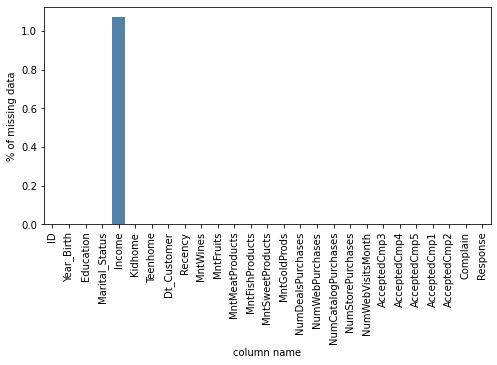

In [10]:
plt.figure(figsize = (8,4))
ax = sns.barplot(x=df_cleaned.columns, y=np.sum(df_cleaned.isna())/df.shape[0]*100, 
                 color="steelblue")
ax.set(xlabel = "column name", ylabel = "% of missing data")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Only income column has missing data (may be because the respondant not willing to tell their income) <br>
Only account for around 1% -> not too much (maybe can be dropped)